In [ ]:
pip install statsmodels


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [134]:
data=pd.read_csv("data.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [10]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [11]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [28]:
d=data[0:0]
d2=data.iloc[0:3,0:2]
#    column_range , column_number
print(d2)
# for dl in d:
#     data[dl].unique()
#     print(dl, data[dl].unique())


           Brand    Price
0            BMW   4200.0
1  Mercedes-Benz   7900.0
2  Mercedes-Benz  13300.0


In [57]:
data["Price"].fillna(data["Price"].mean(),inplace=True)


/var/folders/x5/pw1k_2d12jbfrsn2m_cr91_40000gn/T/ipykernel_15644/726221492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Price"].fillna(data["Price"].mean(),inplace=True)


In [58]:
data["EngineV"].fillna(data["EngineV"].mean(),inplace=True)

/var/folders/x5/pw1k_2d12jbfrsn2m_cr91_40000gn/T/ipykernel_15644/2192086902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["EngineV"].fillna(data["EngineV"].mean(),inplace=True)


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4345 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4345 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [49]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

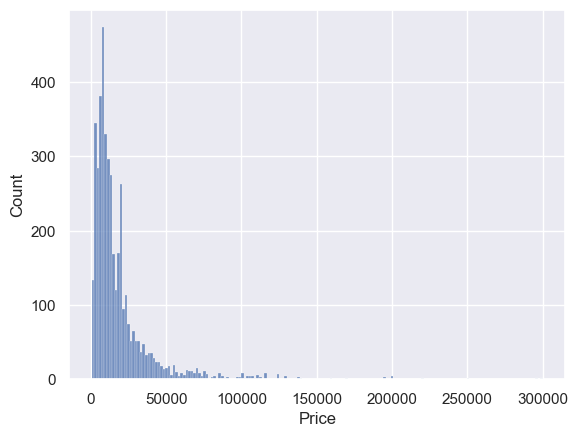

In [50]:
sns.histplot(data["Price"])

63699.99999999982


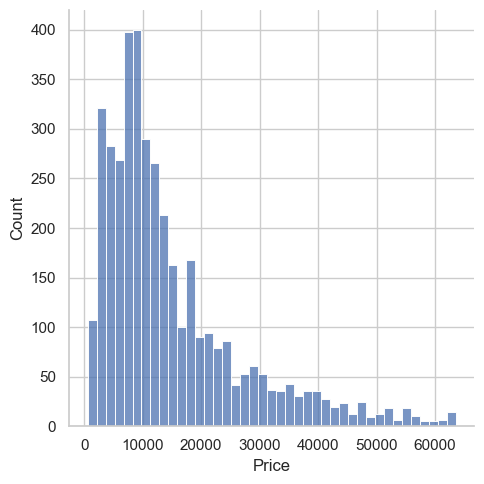

In [135]:
q = data['Price'].quantile(0.95)
print(q)
data = data[data['Price']<q]
sns.displot(data['Price'])


In [60]:
data["Price"].describe()

count     4127.000000
mean     14909.674735
std      11669.624425
min        600.000000
25%       6900.000000
50%      11300.000000
75%      19418.746935
max      62900.000000
Name: Price, dtype: float64

2550.0


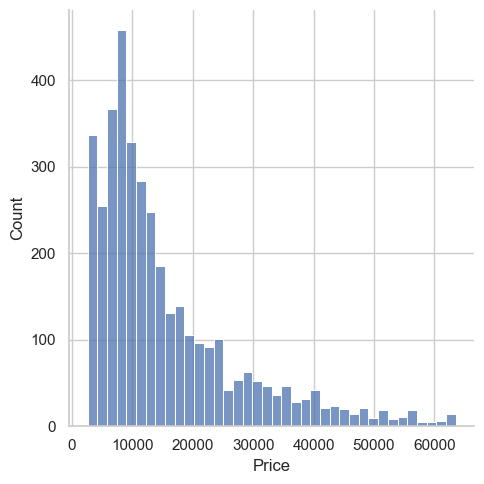

In [136]:
q2=data["Price"].quantile(0.05)
print(q2)
data = data[data['Price']<q]
data = data[data['Price']>q2]
sns.displot(data['Price'])

In [70]:
data["Price"].describe()

count     3794.000000
mean     16013.591601
std      11532.632630
min       3200.000000
25%       7900.000000
50%      12225.000000
75%      19800.000000
max      62900.000000
Name: Price, dtype: float64

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, EngineV, Engine Type, Registration, Year, Model]
Index: []


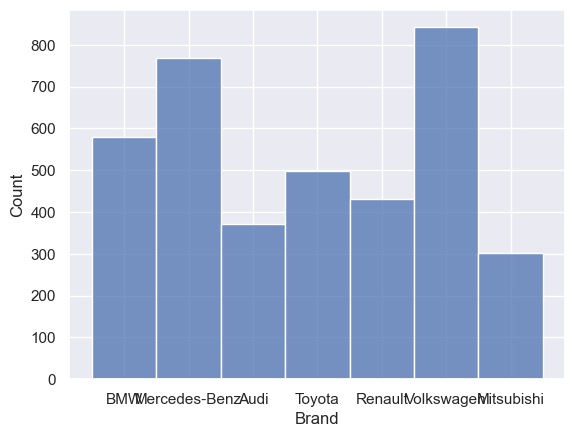

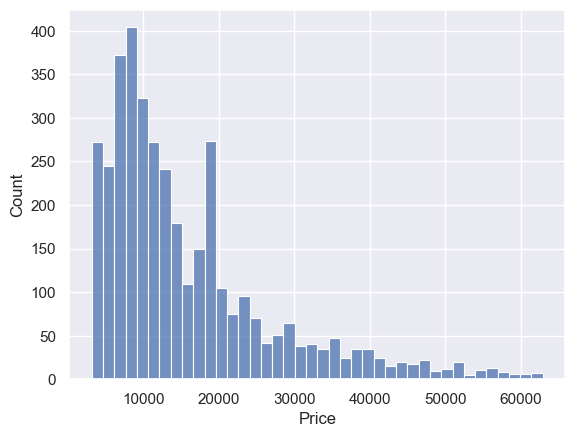

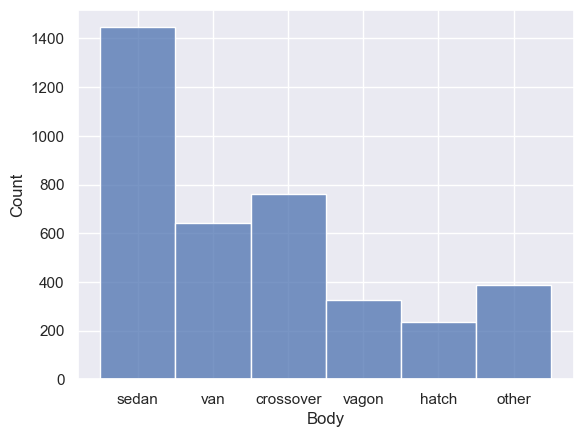

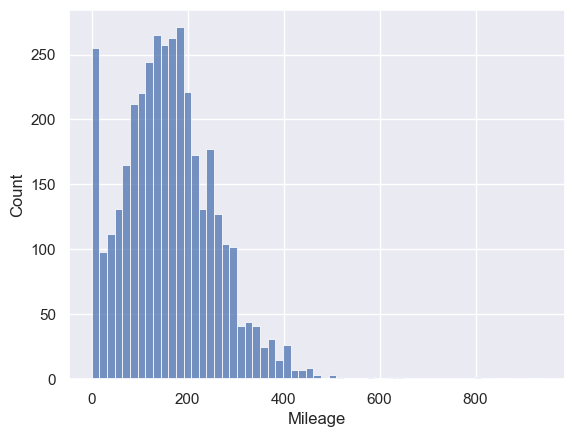

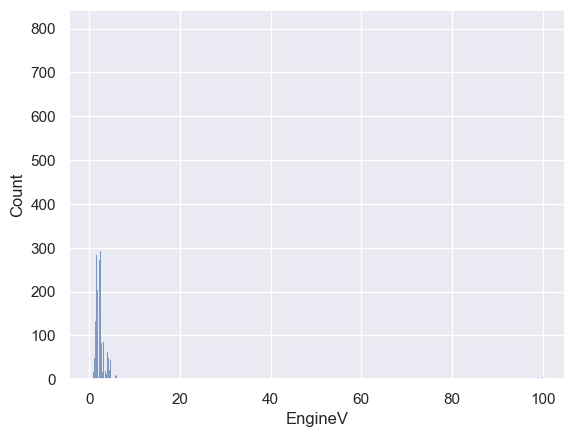

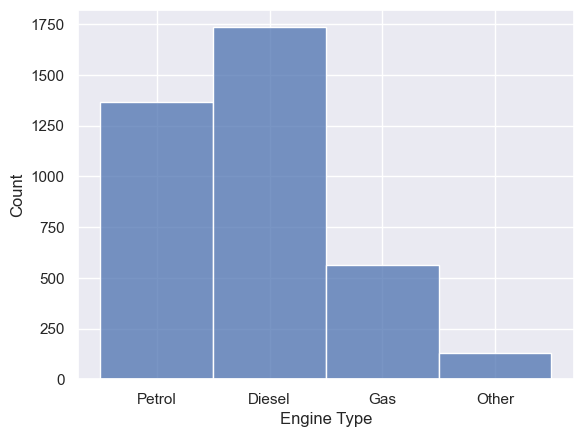

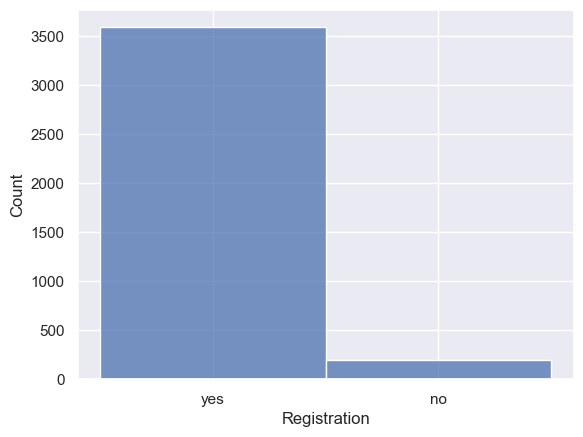

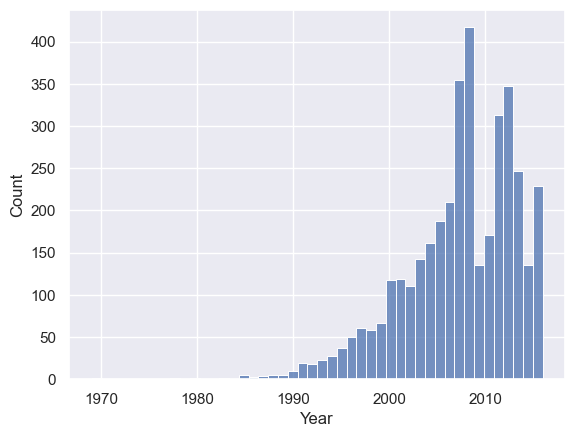

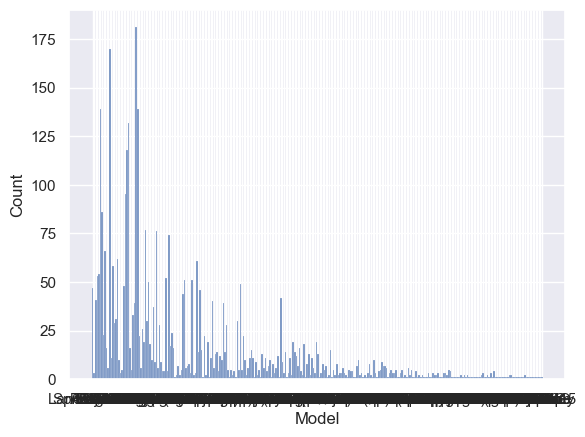

In [72]:
d=data[0:0]
print(d)
for dl in d:
    sns.histplot(data[dl])
    plt.show()

In [73]:
data["Mileage"].describe()

count    3794.000000
mean      161.672114
std        98.858465
min         0.000000
25%        94.000000
50%       155.000000
75%       220.000000
max       940.000000
Name: Mileage, dtype: float64

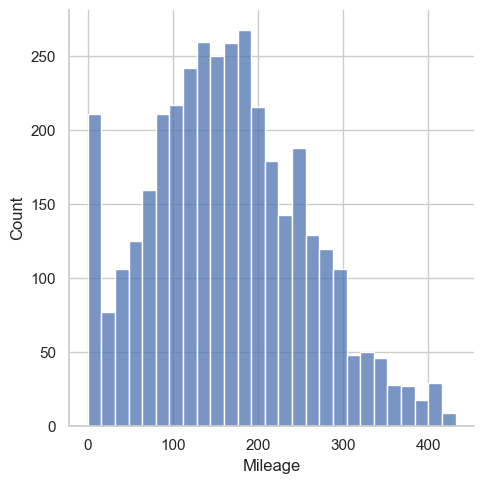

In [137]:
q3=data["Mileage"].quantile(0.99)
data = data[data['Mileage']<q3]
data["Mileage"].describe()
sns.displot(data["Mileage"])

In [ ]:
data["EngineV"].describe()


count    3718.000000
mean        2.744793
std         4.840738
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

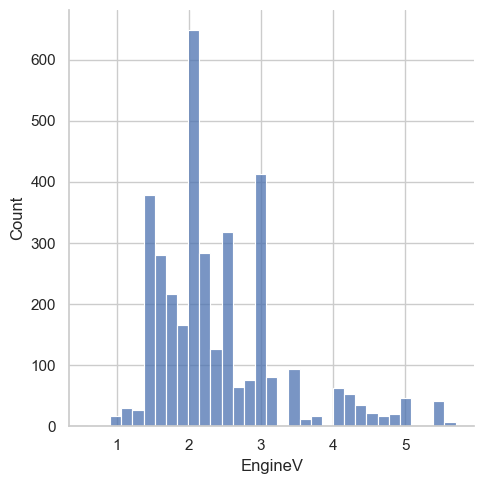

In [138]:
q4=data["EngineV"].quantile(0.99)
data = data[data['EngineV']<q4]
data["EngineV"].describe()
sns.displot(data["EngineV"])

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, EngineV, Engine Type, Registration, Year, Model]
Index: []


<Figure size 1000x600 with 0 Axes>

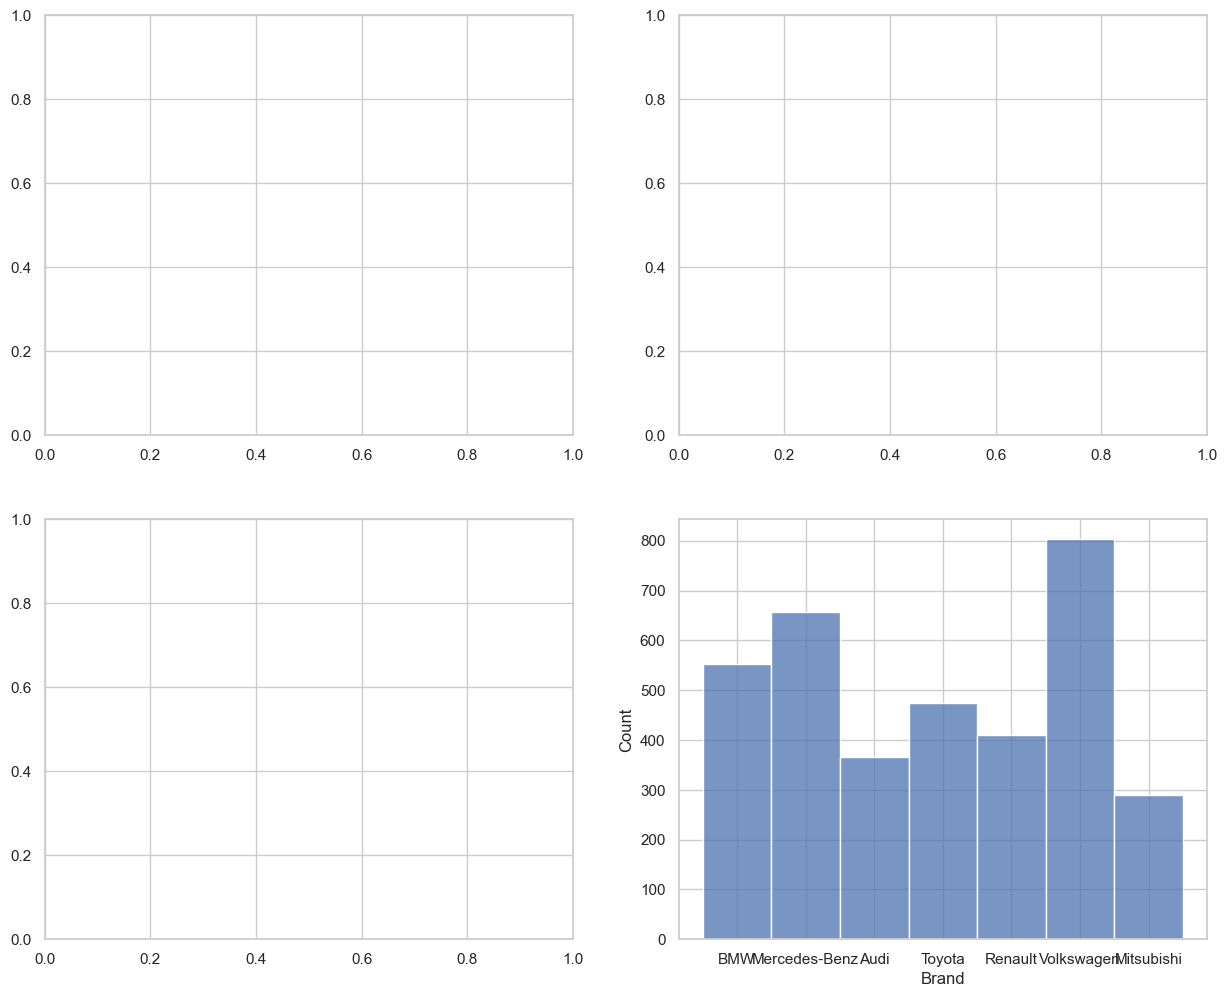

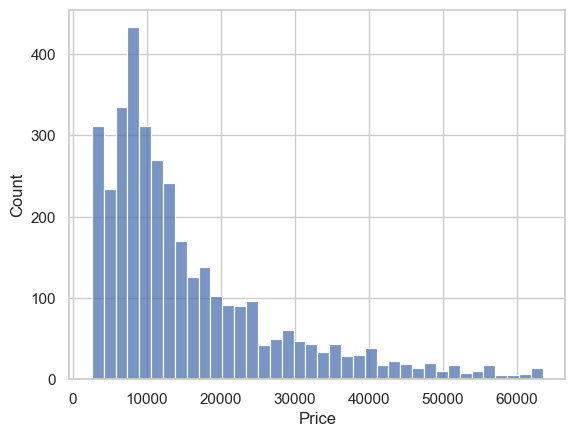

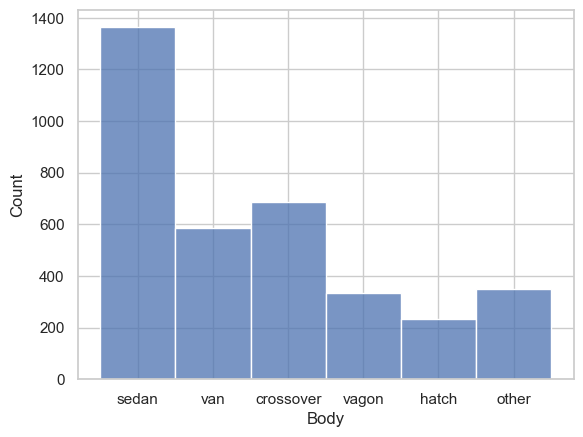

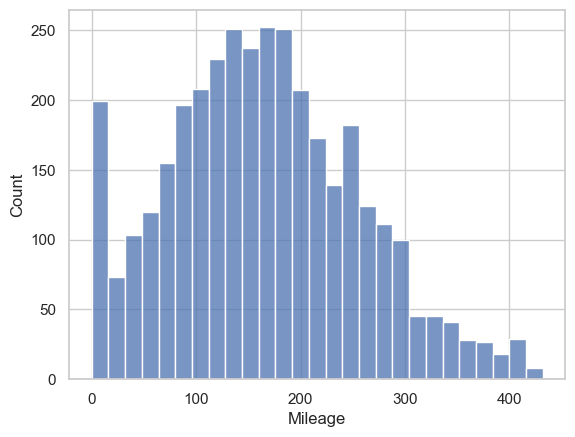

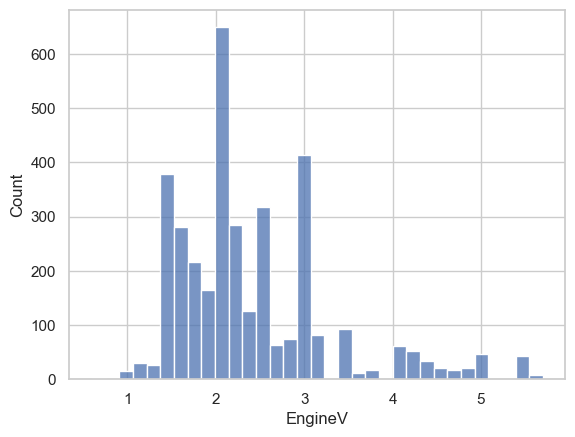

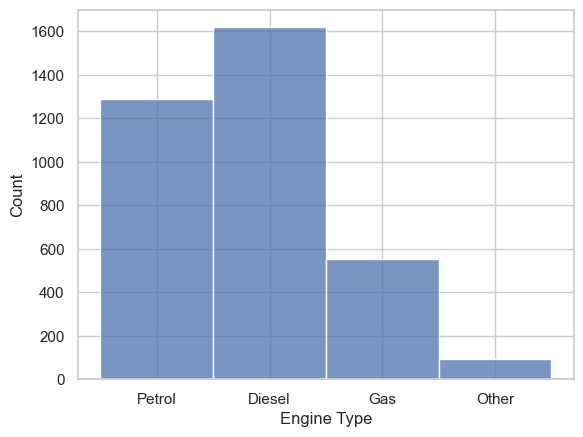

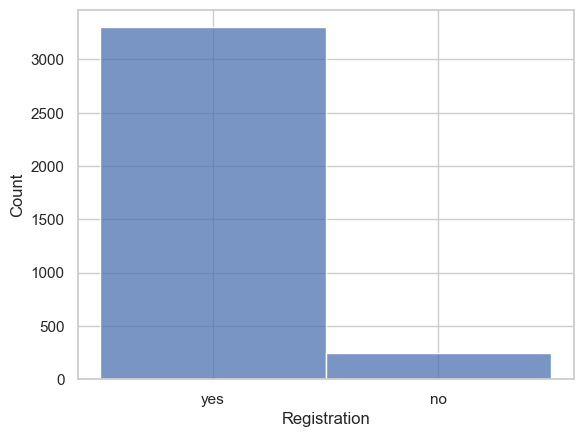

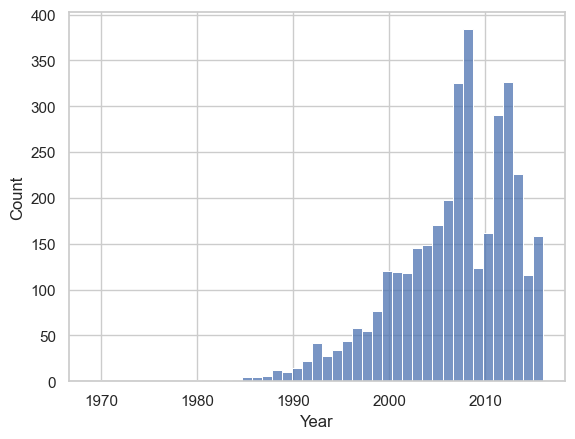

In [139]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 1. Basic Distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
d=data[0:0]
print(d)
for dl in d:
    if dl!="Model":
        sns.histplot(data[dl])
        plt.show()

In [86]:
data["Year"].value_counts()

Year
2008    408
2007    347
2012    346
2011    305
2013    245
2006    208
2005    183
2010    167
2004    155
2016    148
2003    142
2014    135
2009    132
2001    116
2000    114
2002    110
2015     81
1999     59
1997     52
1998     49
1996     41
1995     32
1994     24
1993     20
1992     13
1991     13
1990     10
1989      5
1988      4
1985      4
1986      3
1987      3
1969      1
1983      1
1980      1
Name: count, dtype: int64

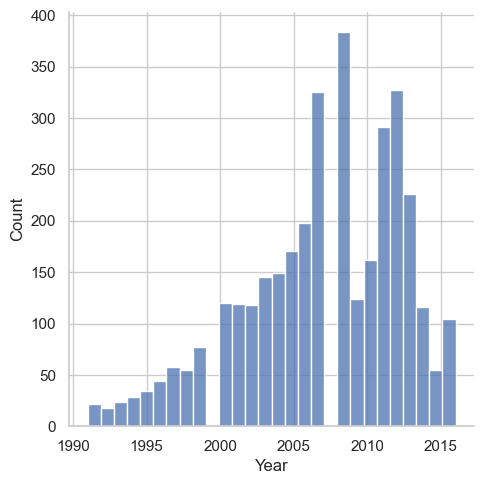

In [140]:
data=data[data["Year"]>1990]
sns.displot(data["Year"])

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, EngineV, Engine Type, Registration, Year, Model]
Index: []


<Figure size 1000x600 with 0 Axes>

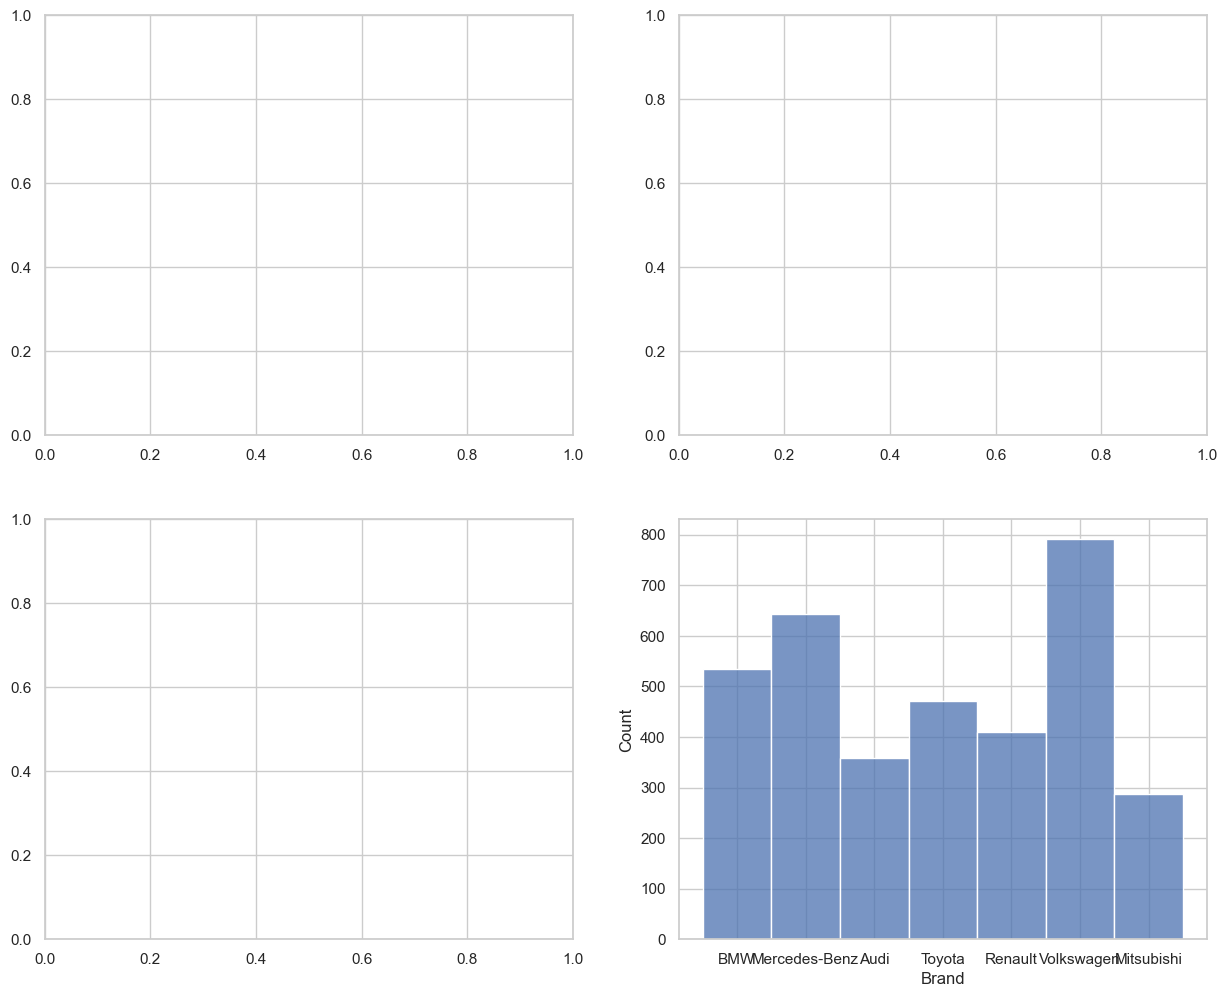

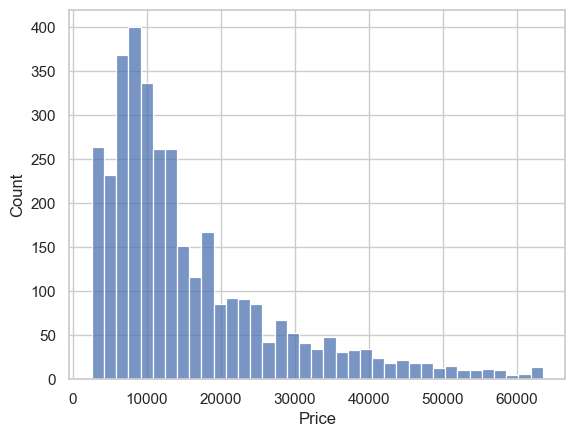

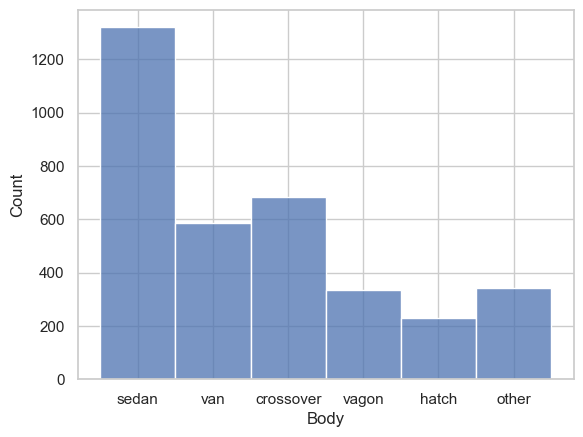

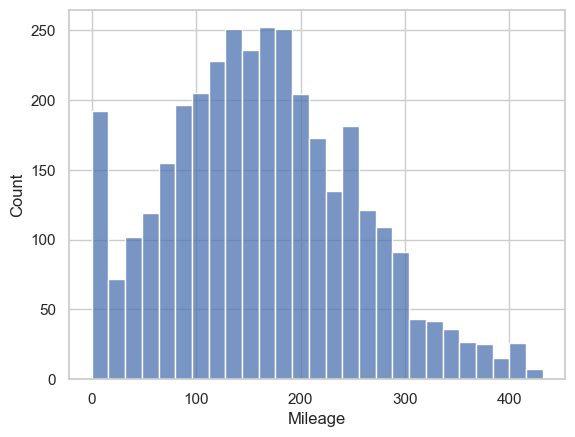

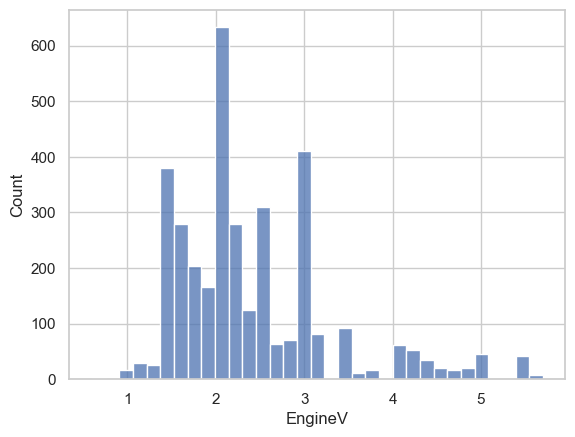

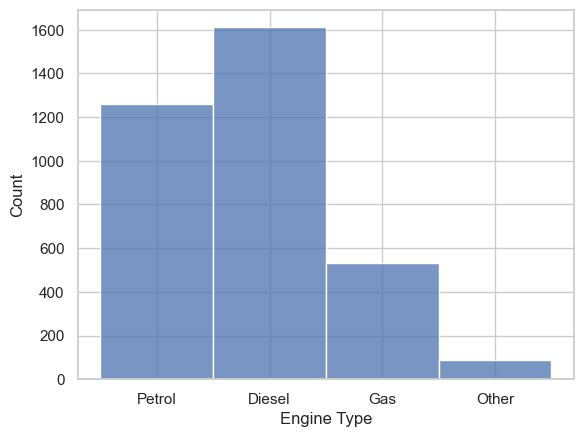

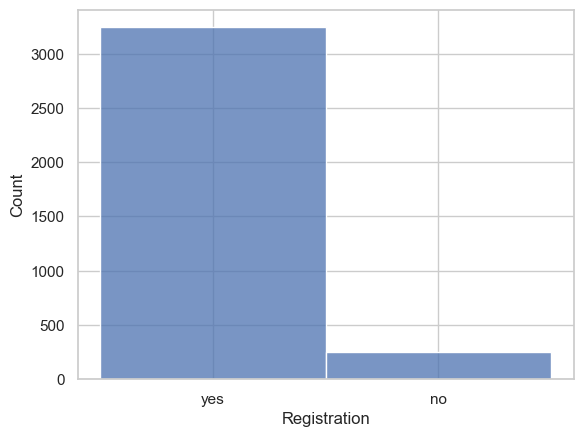

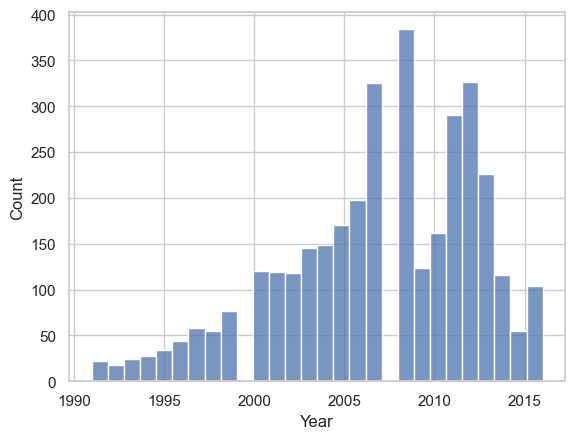

In [141]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 1. Basic Distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
d=data[0:0]
print(d)
for dl in d:
    if dl!="Model":
        sns.histplot(data[dl])
        plt.show()

In [142]:
data_cleaned =  data.reset_index(drop=True)

In [143]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3494,3494.000000,3494,3494.000000,3494.000000,3494,3494,3494.000000,3494
unique,7,NaN,6,NaN,NaN,4,2,NaN,265
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,791,NaN,1320,NaN,NaN,1611,3245,NaN,165
mean,NaN,15790.069637,NaN,162.731254,2.405547,NaN,NaN,2006.955638,NaN
std,NaN,12029.594573,NaN,90.154349,0.893513,NaN,NaN,5.432988,NaN
min,NaN,2600.000000,NaN,0.000000,0.600000,NaN,NaN,1991.000000,NaN
25%,NaN,7600.000000,NaN,98.000000,1.800000,NaN,NaN,2004.000000,NaN
50%,NaN,11700.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20300.000000,NaN,221.000000,3.000000,NaN,NaN,2011.000000,NaN


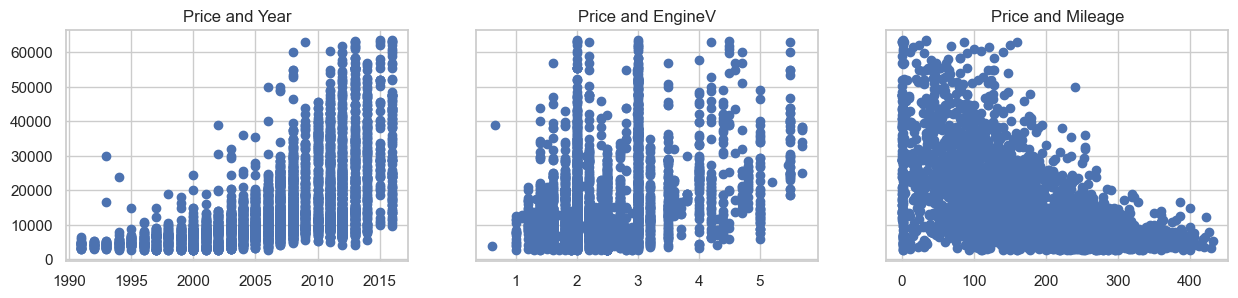

In [144]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [145]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price

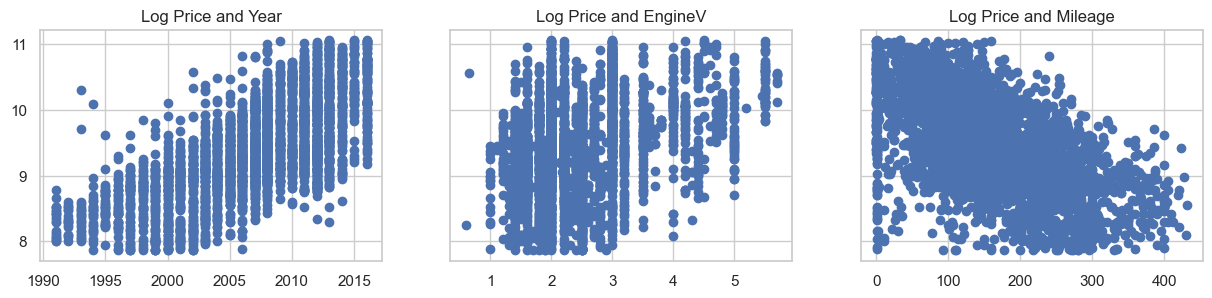

In [146]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [147]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.279986,Mileage
1,10.522807,Year
2,8.331852,EngineV


In [149]:
data = data_cleaned.drop(['Year'],axis=1)

In [150]:
data =pd.get_dummies(data, drop_first=True)

In [151]:
data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_250',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_525',
       'Model_528', 'Model_530', 'Model_535', 'Model_540', 'Model_545',
       'Model_550', 'Model_630', 'Model_640', 'Model_645', 'Model_650',
       'Model_730', 'Model_735', 'Model_740', 'Model_745', 'Model_750',
       'Model_80', 'Model_A 140', 'Model_A

In [152]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data= data[cols]

In [153]:
targets = data['log_price']

inputs = data.drop(['log_price'],axis=1)

In [154]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(data_cleaned)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(data_cleaned)
print(inputs_scaled[0])

ValueError: could not convert string to float: 'BMW'

In [124]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Spliting the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.3, random_state=365)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2551, 292)
(1094, 292)
(2551,)
(1094,)


In [125]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [126]:
# Checking the outputs of the regression
y_hat = reg.predict(x_train)

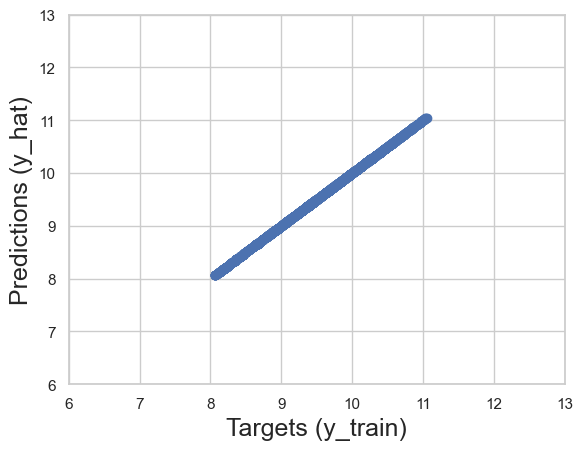

In [127]:
# Comparing the targets (y_train) and the predictions (y_hat)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

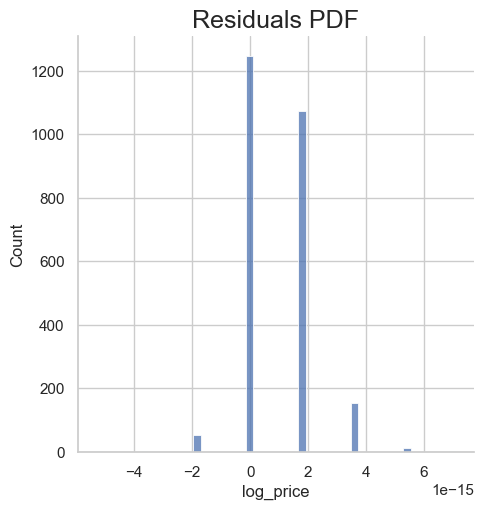

In [128]:
sns.displot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [130]:
score =reg.score(x_train,y_train)
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
# print("Intercept: ",intercept)
# print("Coefficents: ",coefficents)

Score:  1.0


In [131]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

ValueError: Length of values (292) does not match length of index (17)